In [47]:
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd

In [84]:
def populate(grid, start_date, end_date, labor_days):

    assert end_date > start_date, f'start date {start_date} is less than or equal to end date {end_date}'
    
    start_offset_days = (start_date - datetime(2019,1,1)).days
    end_offset_days = (end_date - datetime(2019,1,1)).days
    
    days_in_period = end_offset_days - start_offset_days
    
    assert labor_days <= days_in_period, (f'start date {start_date}, end date {end_date}:'
                                          f'the number of labor days {labor_days}'
                                          ' is greater than or equal to '
                                          f'the number of actual days in period {days_in_period}')
    
    avg_time_spent = labor_days/days_in_period
    
    grid[start_offset_days: end_offset_days] += avg_time_spent
    
    delta_grid = np.zeros(3500)
    delta_grid[start_offset_days: end_offset_days] += avg_time_spent
    
    if (grid[grid > 1]).size > 0:
        print(f'PROBLEM: adding date range {start_date} to {end_date} results in max daily work being exceeded')
        return (False, delta_grid)
    else:
        return (True, delta_grid)

In [85]:
def check_member(df, team_member):
    print(f'Checking member {team_member}..')
    if df[team_member].isnull().values.any():
        print(f'Found a nan value for row {df[df[team_member].isnull()]}')
    grid = np.zeros(3500)
    all_ok = True
    delta_list = []
    for index, row in df.iterrows():
        start_date = datetime.strptime(row['Start'], '%Y-%m-%d')
        end_date = datetime.strptime(row['Finish'], '%Y-%m-%d')
        labor_days = row[team_member]
        print(f'Checking {start_date} to {end_date} and days {labor_days}')
        result, delta = populate(grid, start_date, end_date, labor_days)
        delta_list.append(delta)
        if not result:
            all_ok = False
    if all_ok:
        print(f'OK for member {team_member}')
    else:
        print(f'PROBLEMS found for member {team_member}')
    return grid, delta_list

In [86]:
df = pd.read_csv('drp-plan.csv', skipinitialspace=True, quotechar='"' ).applymap(lambda x: x.strip() if type(x)==str else x)


In [87]:
df

,Task,Start,Finish,Complete,Category,Description,Price,Caplar,Belland,Yasuda,Yabe,Yamashita,Mineo,NAOJ-2
0,PSF model self-consistent across defocuses,2020-06-01,2020-08-30,0,PSF,Ensure that illumination estimate of the pupil...,5,20,0,0,0,0,0,0
1,PSF model (B detector modeling),2020-08-01,2020-09-01,0,PSF,While the PSF for the R detector has been exam...,0,12,0,0,0,0,0,0
2,PSF model self-consistent within same fiber,2020-09-01,2020-11-01,0,PSF,Ensure that illumination estimate of the pupil...,2,24,0,0,0,0,0,0
3,PSF: interpolate in zernike space,2020-11-01,2021-03-31,0,PSF,Interpolate PSF model in zernike space as oppo...,10,40,0,0,0,0,0,0
4,PSF modelling (600 fibers),2021-04-01,2021-06-01,0,PSF,Check that the PSF model is applicable for a f...,5,20,0,0,0,0,0,0
5,PSF modelling (N),2020-10-01,2021-01-30,0,PSF,Model the PSF for the NIR detector.,5,20,0,0,0,0,0,0
6,PSF QA,2020-10-01,2021-01-30,0,PSF,Validate the quality of the PSF,0,5,5,0,0,0,0,0
7,FRD: metric for quantifying effect,2020-07-01,2020-07-31,0,PSF,Provide a quantitive measurement for the effec...,0,2,5,0,0,0,0,0
8,FRD modelling,2019-09-01,2021-01-01,0,PSF,Model the effect of the FRD on the 2D PSF.,0,30,150,0,0,0,0,0
9,FRD effect w/cable B,2021-01-01,2021-04-01,0,PSF,Measure the contribution to the FRD based on t...,0,10,20,0,0,0,0,0


In [88]:
for member in ['Price', 'Caplar', 'Belland', 'Yasuda', 'Yabe', 'Yamashita', 'Mineo', 'NAOJ-2']:
    check_member(df, member)

Checking member Price..
Checking 2020-06-01 00:00:00 to 2020-08-30 00:00:00 and days 5
Checking 2020-08-01 00:00:00 to 2020-09-01 00:00:00 and days 0
Checking 2020-09-01 00:00:00 to 2020-11-01 00:00:00 and days 2
Checking 2020-11-01 00:00:00 to 2021-03-31 00:00:00 and days 10
Checking 2021-04-01 00:00:00 to 2021-06-01 00:00:00 and days 5
Checking 2020-10-01 00:00:00 to 2021-01-30 00:00:00 and days 5
Checking 2020-10-01 00:00:00 to 2021-01-30 00:00:00 and days 0
Checking 2020-07-01 00:00:00 to 2020-07-31 00:00:00 and days 0
Checking 2019-09-01 00:00:00 to 2021-01-01 00:00:00 and days 0
Checking 2021-01-01 00:00:00 to 2021-04-01 00:00:00 and days 0
Checking 2021-03-01 00:00:00 to 2021-04-01 00:00:00 and days 0
Checking 2020-10-01 00:00:00 to 2020-11-01 00:00:00 and days 2
Checking 2020-08-01 00:00:00 to 2021-06-01 00:00:00 and days 10
Checking 2019-06-01 00:00:00 to 2021-06-01 00:00:00 and days 0
Checking 2020-09-01 00:00:00 to 2021-06-01 00:00:00 and days 180
Checking 2020-12-01 00:00:0

In [91]:
grid, delta_list = check_member(df, 'Price')

Checking member Price..
Checking 2020-06-01 00:00:00 to 2020-08-30 00:00:00 and days 5
Checking 2020-08-01 00:00:00 to 2020-09-01 00:00:00 and days 0
Checking 2020-09-01 00:00:00 to 2020-11-01 00:00:00 and days 2
Checking 2020-11-01 00:00:00 to 2021-03-31 00:00:00 and days 10
Checking 2021-04-01 00:00:00 to 2021-06-01 00:00:00 and days 5
Checking 2020-10-01 00:00:00 to 2021-01-30 00:00:00 and days 5
Checking 2020-10-01 00:00:00 to 2021-01-30 00:00:00 and days 0
Checking 2020-07-01 00:00:00 to 2020-07-31 00:00:00 and days 0
Checking 2019-09-01 00:00:00 to 2021-01-01 00:00:00 and days 0
Checking 2021-01-01 00:00:00 to 2021-04-01 00:00:00 and days 0
Checking 2021-03-01 00:00:00 to 2021-04-01 00:00:00 and days 0
Checking 2020-10-01 00:00:00 to 2020-11-01 00:00:00 and days 2
Checking 2020-08-01 00:00:00 to 2021-06-01 00:00:00 and days 10
Checking 2019-06-01 00:00:00 to 2021-06-01 00:00:00 and days 0
Checking 2020-09-01 00:00:00 to 2021-06-01 00:00:00 and days 180
Checking 2020-12-01 00:00:0

In [92]:
print(grid)

[0. 0. 0. ... 0. 0. 0.]


In [90]:
print(type(grid))

<class 'numpy.ndarray'>


In [93]:
print(delta_list)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

In [46]:
grid.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [48]:
datetime(2019,1,1)+timedelta(days=1)

datetime.datetime(2019, 1, 2, 0, 0)

In [67]:
dates = [datetime(2019,1,1)+timedelta(days=i) for i in range(3500)]

In [68]:
dates

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0),
 datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2019, 1, 13, 0, 0),
 datetime.datetime(2019, 1, 14, 0, 0),
 datetime.datetime(2019, 1, 15, 0, 0),
 datetime.datetime(2019, 1, 16, 0, 0),
 datetime.datetime(2019, 1, 17, 0, 0),
 datetime.datetime(2019, 1, 18, 0, 0),
 datetime.datetime(2019, 1, 19, 0, 0),
 datetime.datetime(2019, 1, 20, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 1, 22, 0, 0),
 datetime.datetime(2019, 1, 23, 0, 0),
 datetime.datetime(2019, 1, 24, 0, 0),
 datetime.datetime(2019, 1, 25, 0, 0),
 datetime.datetime(2019, 1, 26, 0,

In [69]:
import matplotlib

In [72]:
date_list = dates

In [73]:
dates = matplotlib.dates.date2num(date_list)

In [74]:
dates

array([737060., 737061., 737062., ..., 740557., 740558., 740559.])

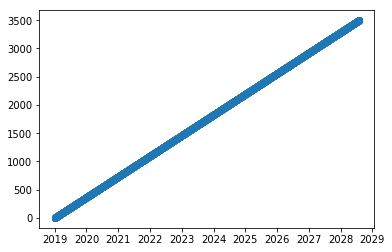

In [75]:
matplotlib.pyplot.plot_date(dates, [i for i in range(3500)])

In [76]:
import matplotlib.pyplot as plt

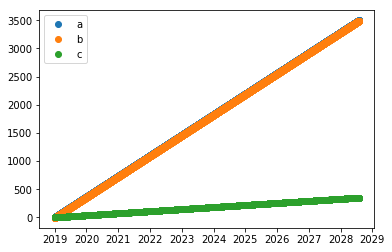

In [79]:
plt.plot_date(dates, [i for i in range(3500)], label='a')
plt.plot_date(dates, [i-10 for i in range(3500)], label='b')
plt.plot_date(dates, [i/10 for i in range(3500)], label='c')
plt.legend(loc="upper left")

In [78]:
len(grid.tolist())

3500

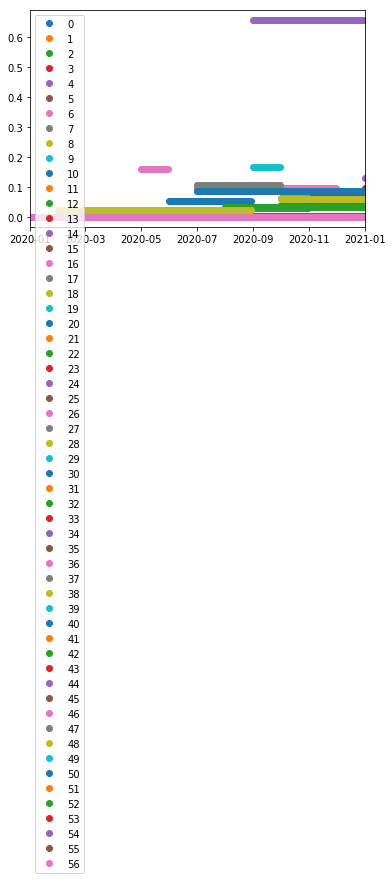

In [95]:
xrange = matplotlib.dates.date2num([datetime(2020,1,1), datetime(2021,1,1)])
for counter, delta in enumerate(delta_list):
    plt.plot_date(dates, delta.tolist(), label=counter)
    plt.legend(loc="upper left")
    plt.xlim(xrange[0], xrange[1])

array([737425., 737791.])